In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CliffWalking():
    def __init__(self, move_type):
        self.pos = np.array([3, 0])
        self.goal = np.array([3, 11])
        if move_type == 'king':
            self.moves = np.array([
                [0, 1],
                [1, 1],
                [1, 0],
                [1, -1],
                [0, -1],
                [-1, -1],
                [-1, 0],
                [-1, 1]
            ])
        elif move_type == 'four':
            self.moves = np.array([
                [0, 1],
                [1, 0],
                [0, -1],
                [-1, 0]
            ])
    
    def move(self, action):
        self.pos += self.moves[action]
        self.pos = np.clip(self.pos, [0, 0], [3, 11])
        if self.pos[0] == 3 and 1 <= self.pos[1] <= 10:
            self.pos = np.array([3, 0])
            return np.copy(self.pos), -100, False
        return np.copy(self.pos), -1, self.is_goal()
    
    def reset(self):
        self.pos = np.array([3, 0])
        return np.copy(self.pos)


    def is_goal(self):
        return np.all(self.pos == self.goal)

In [3]:
class AgentSARSA():
    def __init__(self, move_type):
        if move_type == 'king':
            self.q = np.zeros((4, 12, 8))
            self.MAX_MOVES = 8
        elif move_type == 'four':
            self.q = np.zeros((4, 12, 4))
            self.MAX_MOVES = 4
        
        self.epsilon = 0.9
        self.alpha = 0.01
        self.epsilon_decay = 0.03
    
    def get_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.MAX_MOVES - 1)
        return np.argmax(self.q[state[0], state[1], :])
    
    def update_q(self, transition):
        state, action, reward, next_state = transition
        x, y = state
        next_x, next_y = next_state
        next_action = self.get_action(next_state)
        self.q[x, y, action] += self.alpha * (reward + self.q[next_x, next_y, next_action] - self.q[x, y, action])
    
    def decay_epsilon(self):
        self.epsilon = max(0.1, self.epsilon - self.epsilon_decay)
    
    def get_policy(self):
        best_q = np.max(self.q, axis=2)
        best_actions = np.argmax(self.q, axis=2)
        return best_q, best_actions

In [4]:
class AgentQLearning():
    def __init__(self, move_type):
        if move_type == 'king':
            self.q = np.zeros((4, 12, 8))
            self.MAX_MOVES = 8
        elif move_type == 'four':
            self.q = np.zeros((4, 12, 4))
            self.MAX_MOVES = 4
        
        self.epsilon = 0.9
        self.alpha = 0.01
        self.epsilon_decay = 0.05
    
    def get_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.MAX_MOVES - 1)
        return np.argmax(self.q[state[0], state[1], :])
    
    def update_q(self, transition):
        state, action, reward, next_state = transition
        x, y = state
        next_x, next_y = next_state
        self.q[x, y, action] += self.alpha * (reward + np.max(self.q[next_x, next_y, :]) - self.q[x, y, action])
    
    def decay_epsilon(self):
        self.epsilon = max(0.01, self.epsilon - self.epsilon_decay)
    
    def get_policy(self):
        best_q = np.max(self.q, axis=2)
        best_actions = np.argmax(self.q, axis=2)
        return best_q, best_actions

In [5]:
def plot_results(opt_q, opt_action, move_type, reward_list):
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    
    cax = ax[0].matshow(opt_q, cmap='Pastel2')
    fig.colorbar(cax, ax=ax[0])
    for (i, j), val in np.ndenumerate(opt_q):
        ax[0].text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    ax[0].set_title('Optimal Q-values')
    
    # Plotting opt_action
    if move_type == 'king':
        arrow_dict = {0: '→', 1: '↘', 2: '↓', 3: '↙', 4: '←', 5: '↖', 6: '↑', 7: '↗'}
    elif move_type == 'four':
        arrow_dict = {0: '→', 1: '↓', 2: '←', 3: '↑'}
    cax = ax[1].matshow(opt_action, cmap='cool')
    fig.colorbar(cax, ax=ax[1])
    for (i, j), val in np.ndenumerate(opt_action):
        ax[1].text(j, i, arrow_dict[val], ha='center', va='center', color='black')
    ax[1].set_title('Optimal Actions')

    plt.show()

In [6]:
def run_episode(agent, move_type):
    env = CliffWalking(move_type)
    rewards = []
    for _ in range(10000):
        done = False
        state = env.reset()
        while not done:
            action = agent.get_action(state)
            next_state, reward, done = env.move(action)
            agent.update_q((state, action, reward, next_state))
            state = next_state
        agent.decay_epsilon()
    
    opt_q, opt_action = agent.get_policy()
    plot_results(opt_q, opt_action, move_type, rewards)

# 1. The Cliff Walking Problem (with 4-way moves)

In [7]:
move_type = 'four'

## 1.a. SARSA

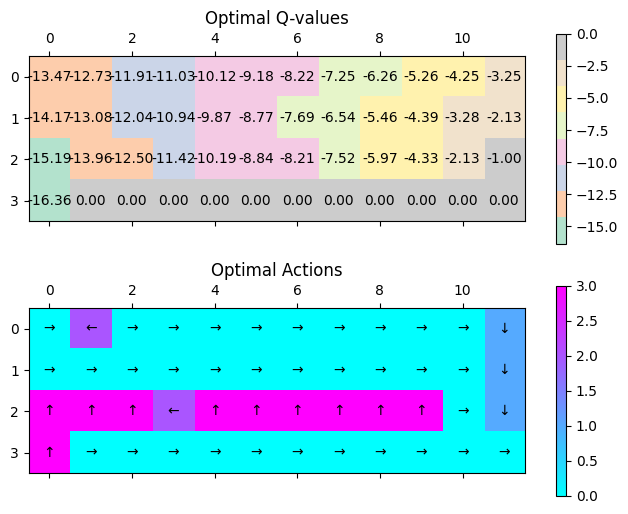

In [8]:
agent = AgentSARSA(move_type)
run_episode(agent, move_type)

## 1.b. Q-Learning

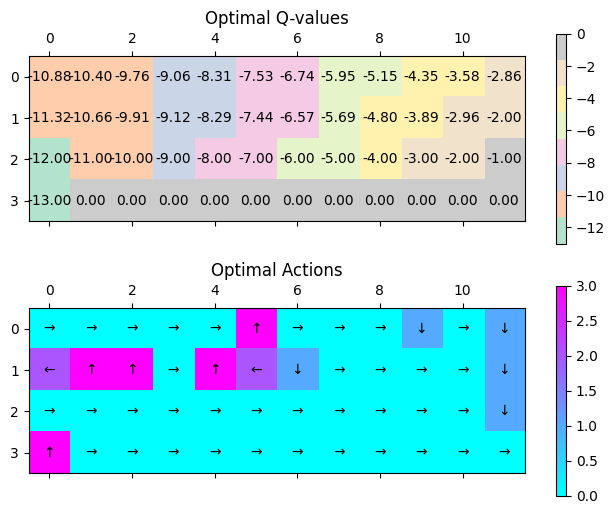

In [9]:
agent = AgentQLearning(move_type)
run_episode(agent, move_type)

# 2. The Cliff Walking Problem (with King's moves)

In [10]:
move_type = 'king'

## 2.a. SARSA

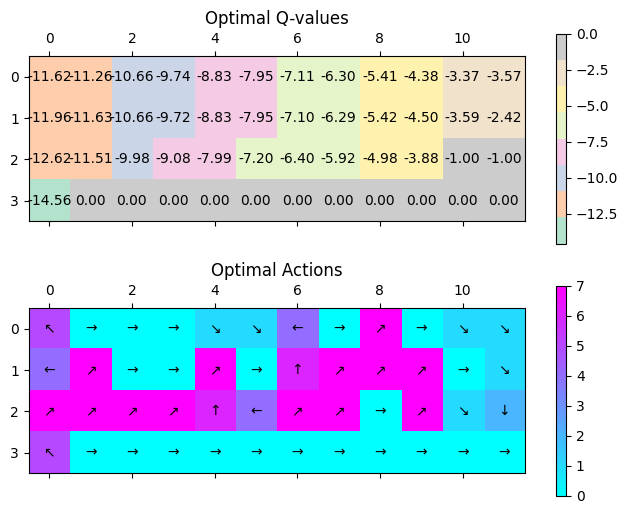

In [11]:
agent = AgentSARSA(move_type)
run_episode(agent, move_type)

## 2.b. Q-Learning

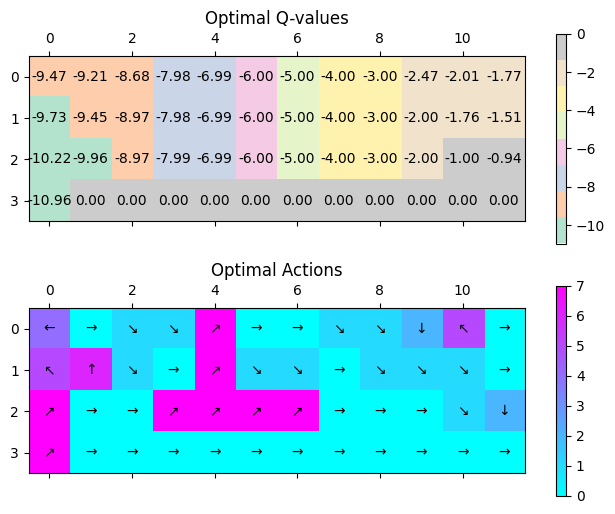

In [12]:
agent = AgentQLearning(move_type)
run_episode(agent, move_type)